In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv(r"C:\Users\User\Desktop\my_data science_pet_projects\Student perfomance\Student_performance_data.csv")

In [5]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [6]:
df.shape

(2392, 15)

In [7]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


# Общее описание данных

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


# Мы видим что нет категориальных данных

In [11]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

# Нет пустых значений

In [12]:
df.duplicated().sum()

0

# Дубликаты отсутствуют

<Axes: xlabel='GradeClass', ylabel='count'>

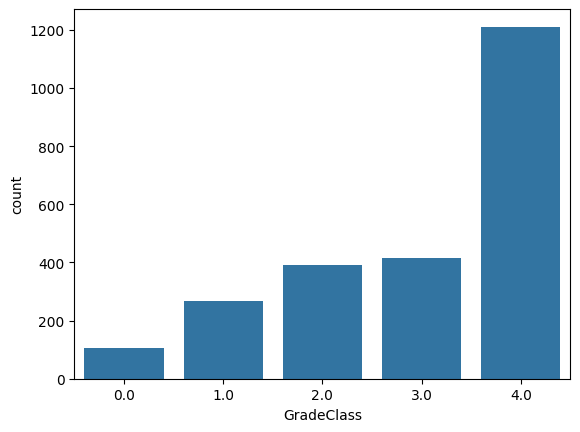

In [13]:
sns.countplot(x='GradeClass', data=df)

# Распределение целевой переменной несбалансировано. Есть скос в сторону 4.0

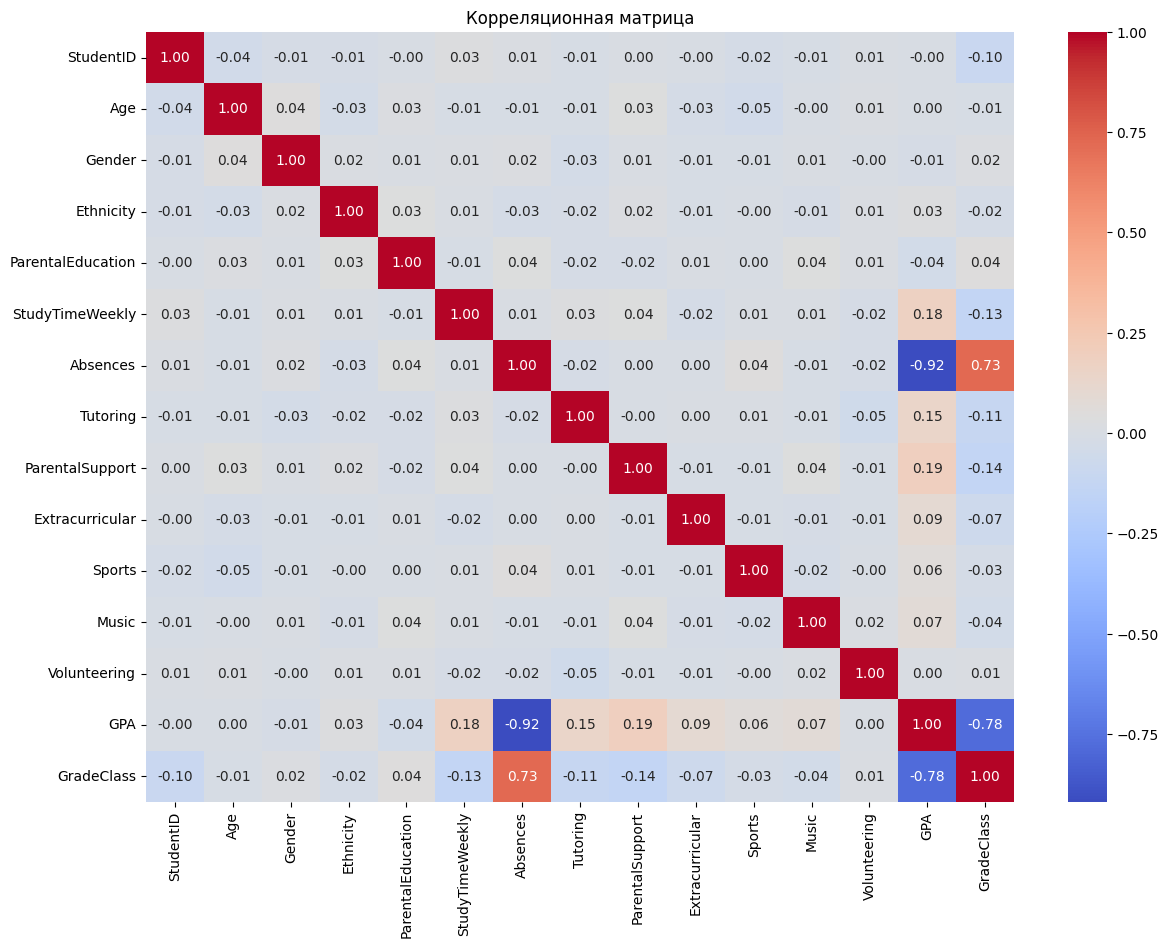

In [14]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

# Из корреляционный матрицы видно что, влияние возраста, гендера,образование родителей,этноса, волонтерства,музыки, спорта, внешкольной активности минимальны. а главные факторы время уделенная на учебу в неделю, степень отсутствия, менторство,поддержки родителей, и средний балл.

In [15]:
df=df.drop(columns='StudentID')
y= df["GradeClass"]
X = df.drop('GradeClass', axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
classifier = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [17]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [18]:
y_pred= classifier.predict(X_test)

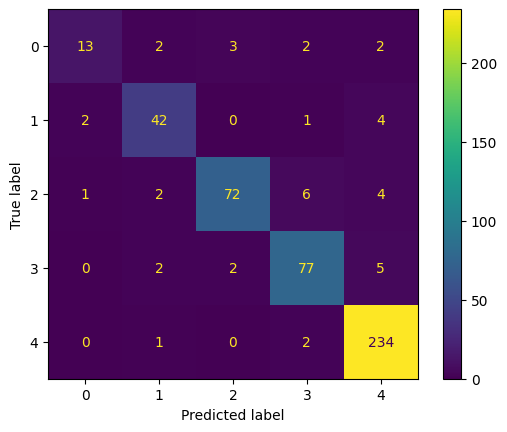

In [20]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.59      0.68        22
         1.0       0.86      0.86      0.86        49
         2.0       0.94      0.85      0.89        85
         3.0       0.88      0.90      0.89        86
         4.0       0.94      0.99      0.96       237

    accuracy                           0.91       479
   macro avg       0.88      0.84      0.86       479
weighted avg       0.91      0.91      0.91       479

0.9144050104384134


# Как видим классы 0.0,1.0 классифицируются плохо, так как мало наблюдений

# Делаем GridSearch в поисках наилучших параметров

In [25]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [21:25:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Лучшие параметры: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

Classification Report:

              precision    recall  f1-score   support

         0.0       0.87      0.59      0.70        22
         1.0       0.86      0.88      0.87        49
         2.0       0.94      0.85      0.89        85
         3.0       0.88      0.90      0.89        86
         4.0       0.94      0.99      0.96       237

    accuracy                           0.92       479
   macro avg       0.90      0.84      0.86       479
weighted avg       0.92      0.92      0.91       479



# Мы получили улучшение в метриках. А теперь попробуем убрать признаками с малым влиянием и обучить модель на оставшихся признаках

In [26]:
newdf = df[['StudyTimeWeekly','GPA','Absences','Tutoring','ParentalSupport','GradeClass']]

In [27]:
y= newdf["GradeClass"]
X = newdf.drop('GradeClass', axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

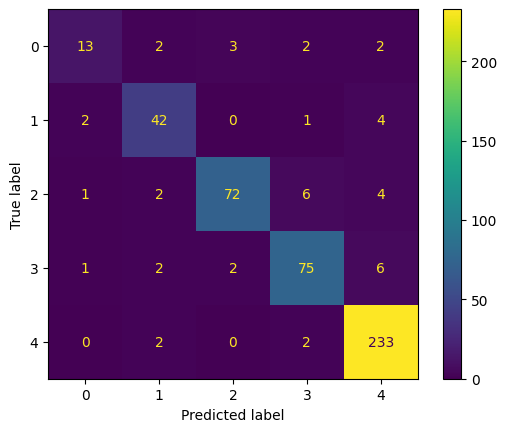

In [28]:
classifier = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

# Из матрицы видно что модель часто классифицирует метку 2 как 3 или 4. А наиболее четко определяет 4 метки. Так как их наибольшее количество

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.59      0.67        22
         1.0       0.84      0.86      0.85        49
         2.0       0.94      0.85      0.89        85
         3.0       0.87      0.87      0.87        86
         4.0       0.94      0.98      0.96       237

    accuracy                           0.91       479
   macro avg       0.87      0.83      0.85       479
weighted avg       0.91      0.91      0.91       479



# Точность почти не изменилась. Сейчас опять попробуем сделать GridSearch

In [31]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [21:34:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Лучшие параметры: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

Classification Report:

              precision    recall  f1-score   support

         0.0       0.81      0.59      0.68        22
         1.0       0.86      0.86      0.86        49
         2.0       0.94      0.85      0.89        85
         3.0       0.88      0.90      0.89        86
         4.0       0.94      0.99      0.96       237

    accuracy                           0.91       479
   macro avg       0.88      0.84      0.86       479
weighted avg       0.91      0.91      0.91       479



# Поиск подходящих параметров не смог улучшить accuracy. Но поднял другие метрики. Убрав больше половины признаков мы добились примерно одних и тех же результатов